In this example, let me guide you through a step-by-step Python script using the scikit-learn library and the California Housing dataset, a classic dataset for regression problems. The dependent variable in this case will be the median house value (MedHouseVal).

First, let's import the necessary libraries and the dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

We can explore the relationship between the features and the target variable by visualizing the correlation matrix:

<AxesSubplot:>

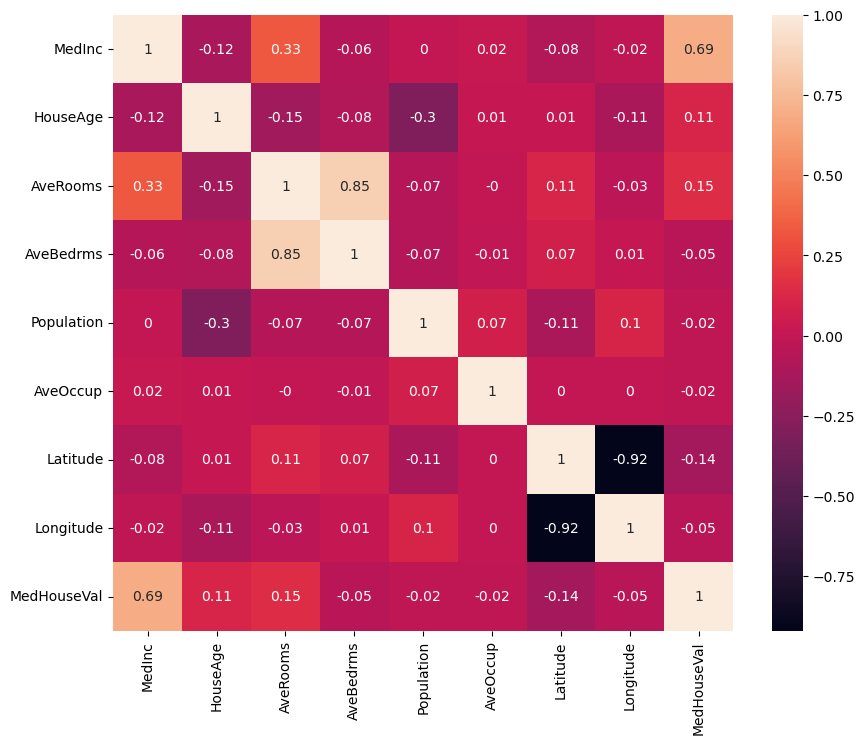

In [3]:
corr_matrix = df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True)

Next, we split our dataset into training and testing sets. For simplicity, let's use only one feature, MedInc (median income in block), which shows a strong positive correlation with MedHouseVal:

In [4]:
X = df[['MedInc']]
Y = df['MedHouseVal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Now, we can build the linear regression model:

In [5]:
lin_model = LinearRegression()
# Fit the model to the data
lin_model.fit(X_train, Y_train)

LinearRegression()

After the model is trained, we can use it to predict the house values in the test set and visualize the results:

In [6]:
# Predict the dependent variable using the trained model
Y_test_predict = lin_model.predict(X_test)

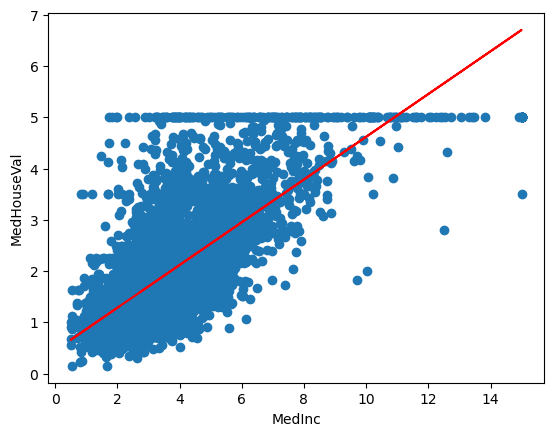

In [7]:
# Visualize the results
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_predict, color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

Finally, we can evaluate the model's performance using the Root Mean Squared Error (RMSE):

In [8]:
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for testing set
RMSE is 0.8430087153316839


This script provides a simple example of predictive analysis with linear regression using the California housing dataset. You can extend it by using more features, trying different regression models, and tuning their parameters.